In [165]:
#import needed libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from time import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Let's look what is the size of the datasets 
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (200000, 202)
Test Shape: (200000, 201)


In [4]:
pd.set_option('display.max_columns', None) #display all columns
pd.set_option('display.max_rows', None) #display all rows
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [5]:
# Total number of records
n_records = len(train)

# Number of records where the client made the transaction
made = train.target.sum()

# Number of records where the client didn't make the transaction
didnt_make = n_records - made

# Percentage of transaction made
percentage = made / n_records 

# Print the results
print("Total number of records: {}".format(n_records))
print("Clients that made the transaction: {}".format(made))
print("Clients that didn't make the transaction: {}".format(didnt_make))
print("Percentage of clients that made the transaction: {}%".format(percentage*100))

Total number of records: 200000
Clients that made the transaction: 20098
Clients that didn't make the transaction: 179902
Percentage of clients that made the transaction: 10.049%


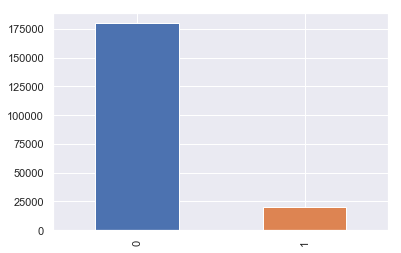

In [6]:
#Plot of distribution of 0 and 1 in the target
train.target.value_counts().plot.bar()

In [163]:
describe_ones = train[train['target']==1].describe().T

In [164]:
describe_zeros = train[train['target']==0].describe().T

In [7]:
train_data = train.copy()

In [8]:
y = train_data['target']
X = train_data.drop(['ID_code','target'], axis = 1)

# Preprocessing the data

In [22]:
from sklearn.decomposition import PCA

Fitting PCA 19/19 Wall time: 56.8 s


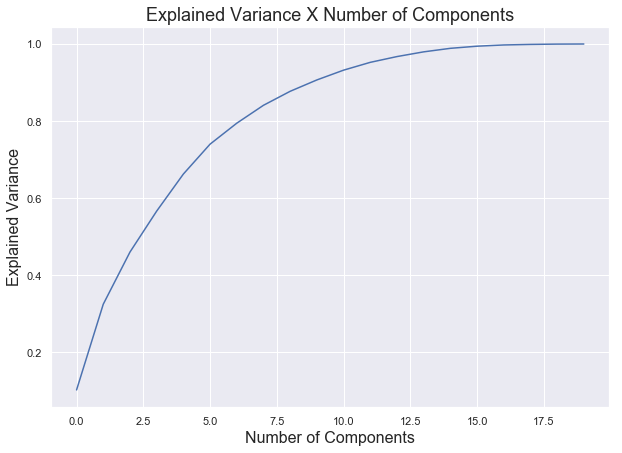

In [190]:
%%time
#Compute explained variance by n_components
variance = []
for i, n in enumerate(np.arange(2,len(X.columns), 10)):
    print("\rFitting PCA {}/19".format(i), end=" ")
    sys.stdout.flush()
    
    pca = PCA(n_components=n)
    pca.fit(X)
    variance.append(pca.explained_variance_ratio_.sum())
    
#Explained Variance Curve 
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(variance)
plt.title('Explained Variance X Number of Components', fontsize=18)
plt.ylabel('Explained Variance', fontsize=16)
plt.xlabel('Number of Components', fontsize=16)
plt.show

In [191]:
def pca_transform(data, pca_components):
    pca = PCA(n_components=pca_components, random_state=0)
    X = pca.fit_transform(data)
    return X

In [192]:
pca_components = 150
X_pca = pca_transform(X, pca_components)

# Baseline Model

In [193]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [194]:
def metrics(y_test, predictions, probabilities):
    cm = confusion_matrix(y_test, predictions)
    auc = round(roc_auc_score(y_test, probabilities), 4)
    fpr = round(100 * (cm[0][1]/(cm[0][0]+cm[0][1])))
    tpr = round(100* (cm[1][1]/(cm[1][0]+cm[1][1])))
    ppv = round(100* (cm[1][1]/(cm[0][1]+cm[1][1])))
    return cm, auc, fpr, tpr, ppv

In [195]:
#Setting up RepeatedStratifiedKFold
splits = 4
repeats = 5
iterations = splits * repeats
rskf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=0)

In [196]:
%%time

results = {}
count = 0
for train_index, test_index in rskf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    baseline_model = LogisticRegressionCV(cv = 2, penalty='l2', n_jobs = -1)
    baseline_model.fit(X_train, y_train)

    pred = baseline_model.predict(X_test)
    proba = baseline_model.predict_proba(X_test)[:,1]

    cm, auc, fpr, tpr, ppv = metrics(y_test, pred, proba)   
    results[count] = {"TN": cm[0][0],
                      "FP": cm[0][1],
                      "FN": cm[1][0],
                      "TP": cm[1][1],
                      "AUC": auc,
                      "FPR": fpr,
                      "TPR": tpr,
                      "PPV": ppv
                     }
    count += 1
    print("\rTraining. {}/{}".format(count,iterations), end=" ")
    sys.stdout.flush()

Training. 20/20 Wall time: 1min 27s


In [197]:
cols = ["TN", "FP", "FN","TP","FPR","TPR","PPV","AUC"]
df_results = pd.DataFrame(results).T[cols]
df_results

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,44539.0,437.0,4104.0,921.0,1.0,18.0,68.0,0.8297
1,44466.0,510.0,4096.0,929.0,1.0,18.0,65.0,0.8258
2,44524.0,451.0,4121.0,903.0,1.0,18.0,67.0,0.8257
3,44528.0,447.0,4091.0,933.0,1.0,19.0,68.0,0.8259
4,44521.0,455.0,4111.0,914.0,1.0,18.0,67.0,0.8342
5,44528.0,448.0,4134.0,891.0,1.0,18.0,67.0,0.8276
6,44479.0,496.0,4076.0,948.0,1.0,19.0,66.0,0.8233
7,44527.0,448.0,4075.0,949.0,1.0,19.0,68.0,0.8222
8,44502.0,474.0,4040.0,985.0,1.0,20.0,68.0,0.8249
9,44547.0,429.0,4111.0,914.0,1.0,18.0,68.0,0.8236


In [198]:
df_results.describe()

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000
mean,44516.500000,459.000000,4098.200000,926.300000,1.0,18.500000,67.050000,0.826810
std,23.376777,23.305748,27.532947,27.644548,0.0,0.688247,1.050063,0.002998
min,44466.000000,429.000000,4040.000000,876.000000,1.0,17.000000,65.000000,0.822200
25%,44502.000000,445.000000,4082.750000,909.000000,1.0,18.000000,66.000000,0.824975
50%,44524.500000,451.000000,4095.000000,930.000000,1.0,18.500000,67.000000,0.826150
75%,44530.000000,473.250000,4115.750000,941.250000,1.0,19.000000,68.000000,0.828300
max,44547.000000,510.000000,4148.000000,985.000000,1.0,20.000000,68.000000,0.834200


numpy.ndarray

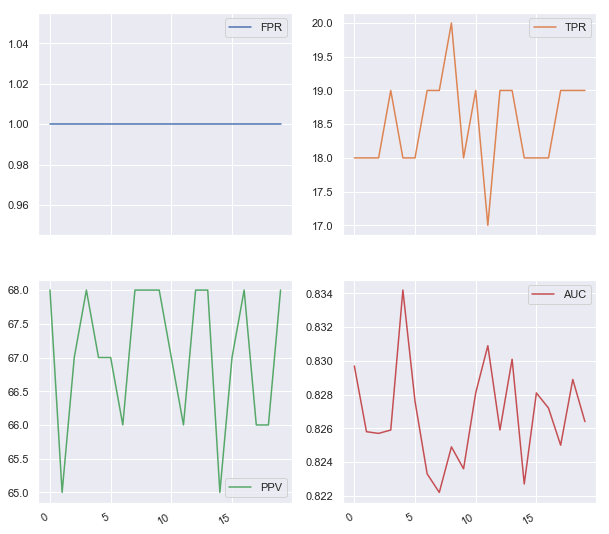

In [199]:
axes = df_results[["FPR","TPR","PPV","AUC"]].plot(subplots=True, layout=(2,2), figsize = (10,10))
type(axes)

In [200]:
print("Average AUC Result: %", round(df_results.AUC.mean(),4))
print("Average FPR Result: %", round(df_results.FPR.mean(),4))
print("Average TPR Result: %", round(df_results.TPR.mean(),4))
print("Average PPV Result: %", round(df_results.PPV.mean(),4))

Average AUC Result: % 0.8268
Average FPR Result: % 1.0
Average TPR Result: % 18.5
Average PPV Result: % 67.05


# XGBoost Model - Training and Testing

In [201]:
#Transforming splits into XGBoost matrices
def get_xgb_matrix(X_train, y_train, X_test, y_test):
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    return D_train, D_test

In [202]:
def model_training(dtrain, params, rounds):
    model = xgb.train(dtrain= dtrain, params= params, num_boost_round= rounds)
    return model

In [203]:
#make predictions based on probabilities and a threshold
def get_preds(probabilities, threshold):
    return np.array([1 if x > threshold else 0 for x in probabilities])

In [204]:
params = {'objective': "binary:logistic",
          'colsample_bytree': .3,
          'learning_rate': 0.1,
          'max_depth': 2,
          'gamma': 10,
          'subsample': 0.8,
          'reg_alpha' : 0.4,
          'scale_pos_weight': 1,
          'tree_method': 'gpu_hist',
          'silent': 1
         }

In [205]:
%%time

results_xgb = {}
count = 0
for train_index, test_index in rskf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    D_train, D_test = get_xgb_matrix(X_train, y_train, X_test, y_test)
    
    model = model_training(D_train, params, 2500)
    
    probas = model.predict(D_test)

    preds = get_preds(probas, 0.5)
   
    cm, auc, fpr, tpr, ppv = metrics(y_test, preds, probas)   
    results_xgb[count] = {"TN": cm[0][0],
                      "FP": cm[0][1],
                      "FN": cm[1][0],
                      "TP": cm[1][1],
                      "AUC": auc,
                      "FPR": fpr,
                      "TPR": tpr,
                      "PPV": ppv
                     }
    count += 1
    print("\rTraining. {}/{}".format(count,iterations), end=" ")
    sys.stdout.flush()

Training. 20/20 Wall time: 4min 21s


In [206]:
df_results_xgb = pd.DataFrame(results_xgb).T[cols]
df_results_xgb

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,44355.0,621.0,3657.0,1368.0,1.0,27.0,69.0,0.8595
1,44353.0,623.0,3668.0,1357.0,1.0,27.0,69.0,0.8549
2,44391.0,584.0,3691.0,1333.0,1.0,27.0,70.0,0.8573
3,44375.0,600.0,3665.0,1359.0,1.0,27.0,69.0,0.8556
4,44387.0,589.0,3677.0,1348.0,1.0,27.0,70.0,0.8629
5,44390.0,586.0,3680.0,1345.0,1.0,27.0,70.0,0.8590
6,44320.0,655.0,3661.0,1363.0,1.0,27.0,68.0,0.8564
7,44360.0,615.0,3653.0,1371.0,1.0,27.0,69.0,0.8541
8,44350.0,626.0,3655.0,1370.0,1.0,27.0,69.0,0.8548
9,44370.0,606.0,3659.0,1366.0,1.0,27.0,69.0,0.8559


In [207]:
df_results_xgb.describe()

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
count,20.0000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000
mean,44368.2000,607.300000,3665.600000,1358.900000,1.0,26.950000,69.150000,0.857395
std,22.7008,22.590403,23.288579,23.505654,0.0,0.394034,0.875094,0.002248
min,44320.0000,578.000000,3598.000000,1319.000000,1.0,26.000000,67.000000,0.854100
25%,44354.5000,586.750000,3655.750000,1346.500000,1.0,27.000000,69.000000,0.855575
50%,44370.5000,605.000000,3666.500000,1358.000000,1.0,27.000000,69.000000,0.857250
75%,44388.5000,621.500000,3677.750000,1369.250000,1.0,27.000000,70.000000,0.859050
max,44398.0000,655.000000,3705.000000,1427.000000,1.0,28.000000,71.000000,0.862900


numpy.ndarray

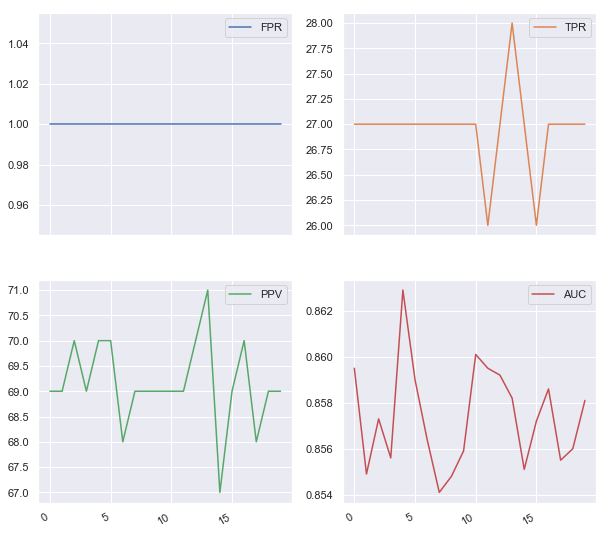

In [208]:
axes = df_results_xgb[["FPR","TPR","PPV","AUC"]].plot(subplots=True, layout=(2,2), figsize = (10,10))
type(axes)

In [209]:
print("Average AUC Result: %", round(df_results_xgb.AUC.mean(),4))
print("Average FPR Result: %", round(df_results_xgb.FPR.mean(),4))
print("Average TPR Result: %", round(df_results_xgb.TPR.mean(),4))
print("Average PPV Result: %", round(df_results_xgb.PPV.mean(),4))

Average AUC Result: % 0.8574
Average FPR Result: % 1.0
Average TPR Result: % 26.95
Average PPV Result: % 69.15


## ROC Curve

In [190]:
roc_values = []
for thresh in np.linspace(0, 1, 101):
    preds = get_preds(probs, thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

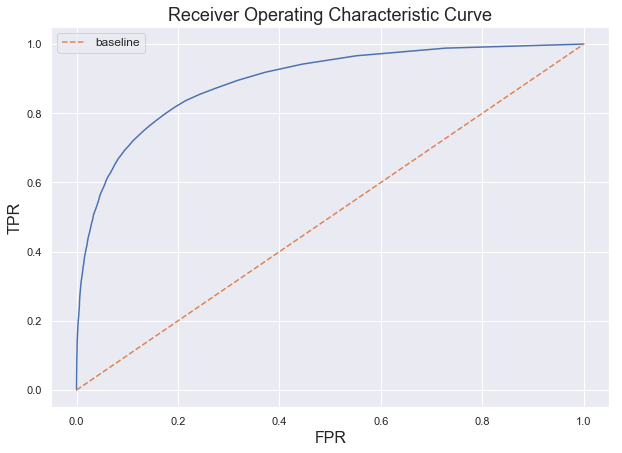

In [191]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

# Submission

In [216]:
def transform_data(data):
    final_data = data.drop(['ID_code'], axis = 1)
    #final_data = xgb.DMatrix(final_data)
    return final_data

In [14]:
def make_csv(test_data, model):
    preds_final = model.predict_proba(test_data)[:,1]
    predictions = pd.Series(preds_final, index = test['ID_code'], name = 'target')
    return predictions.to_csv("submission.csv", header = True)

In [253]:
test_data = transform_data(test)

In [254]:
make_csv(test_data, baseline_model)

In [21]:
pred = np.random.choice([0,1], 200000, p=[0.9,0.1])
pred = pd.Series(pred, index = test['ID_code'], name = 'target')
pred.to_csv("submission.csv", header = True)

In [17]:
pred.sum()

19840